### Importing Libraries:

In [2]:
!pip install pandas-profiling

  Using cached confuse-1.4.0-py2.py3-none-any.whl (21 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
Processing c:\users\ferns\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243\htmlmin-0.1.12-py3-none-any.whl
  Using cached ImageHash-4.2.0-py2.py3-none-any.whl (295 kB)
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107420 sha256=7c47b8138cd288162c9ac8d61900b0ffcb4a8fc1a2968e793c2843bb3cc4c706
  Stored in directory: c:\users\ferns\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
Successfully built phik


In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import pandas_profiling as pp
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

### Importing Data: 

In [4]:
raw_data = pd.read_csv("bank-full.csv", sep=";")
raw_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Exploratory Data Analysis:

In [114]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Categorial data
cat_data = raw_data.select_dtypes(exclude='number')
cat_data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


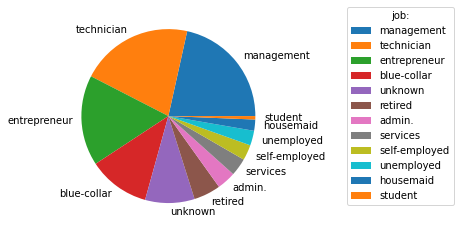

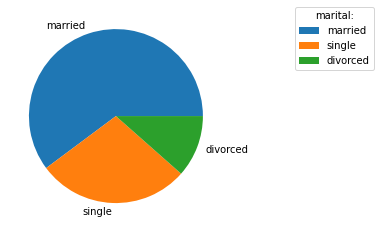

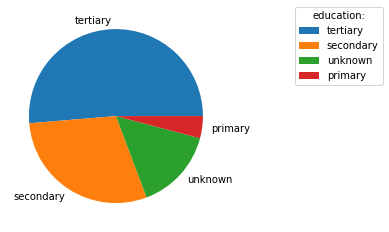

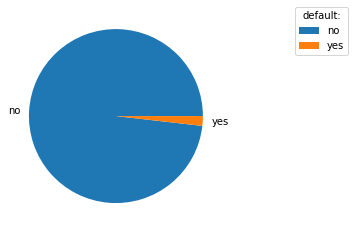

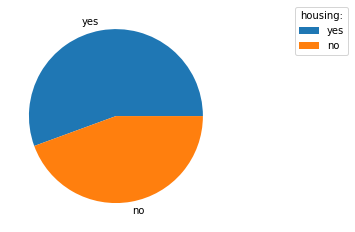

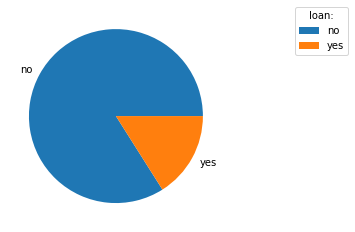

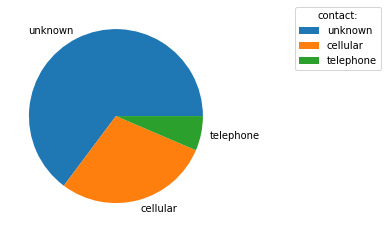

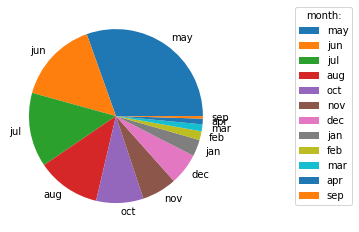

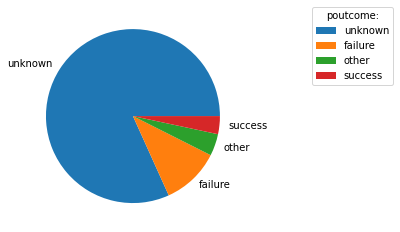

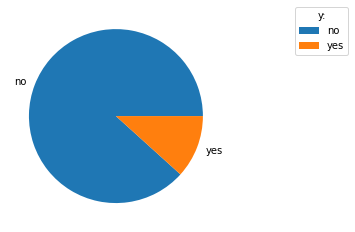

In [25]:
for x in cat_data.columns:
    plt.pie(cat_data[x].value_counts(), labels = cat_data[x].unique())
    plt.legend(title=f"{x}:", loc= "upper left", bbox_to_anchor=(1.3,1.025))
    plt.show()

In [6]:
# Numerical data
num_data = raw_data.select_dtypes(include='number')
num_data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [119]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### the value of pdays if -1 means the person is not contacted. So we can make a new feature i.e. if a person was contacted or not.

In [120]:
raw_data["pdays_no_contact"] = (raw_data["pdays"] != -1) * 1
raw_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_no_contact
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


In [6]:
# Checking how many values are there in categorical data
for col in cat_data:
    print(col, "\n")
    print(cat_data[col].value_counts())
    print("_____________","\n\n")

job 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
_____________ 


marital 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
_____________ 


education 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
_____________ 


default 

no     44396
yes      815
Name: default, dtype: int64
_____________ 


housing 

yes    25130
no     20081
Name: housing, dtype: int64
_____________ 


loan 

no     37967
yes     7244
Name: loan, dtype: int64
_____________ 


contact 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
_____________ 


month 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     26

#### Is there a balance between yes and no in our data? 

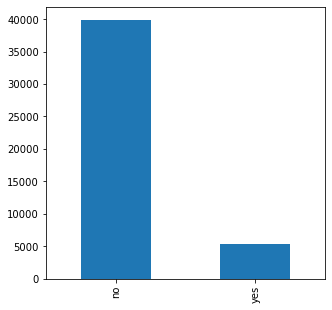

In [7]:
plt.rcParams["figure.figsize"] = (5,5)
raw_data["y"].value_counts().plot.bar()

###### Observation: We can see that the data is imbalanced as there are more No values than Yes values therefore the model may be biased

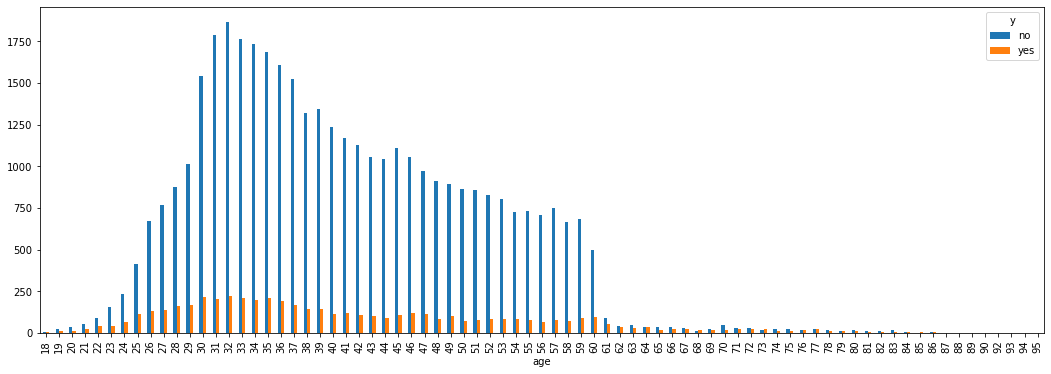

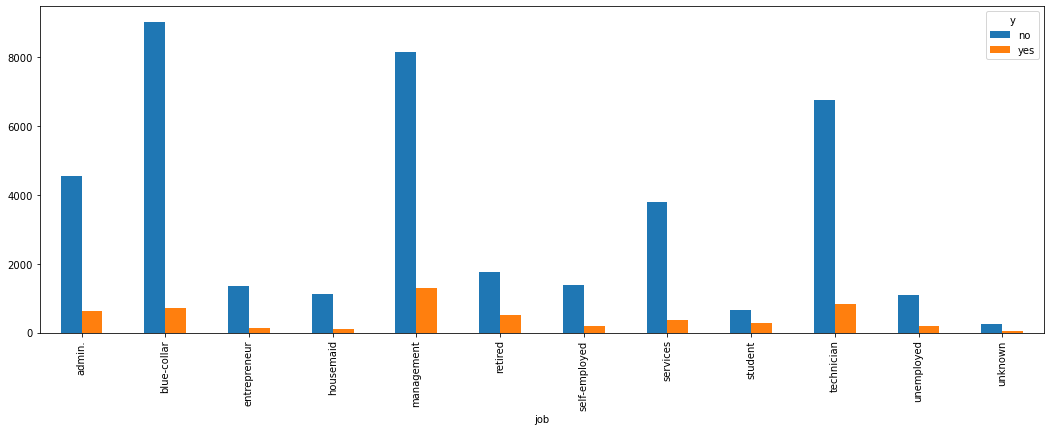

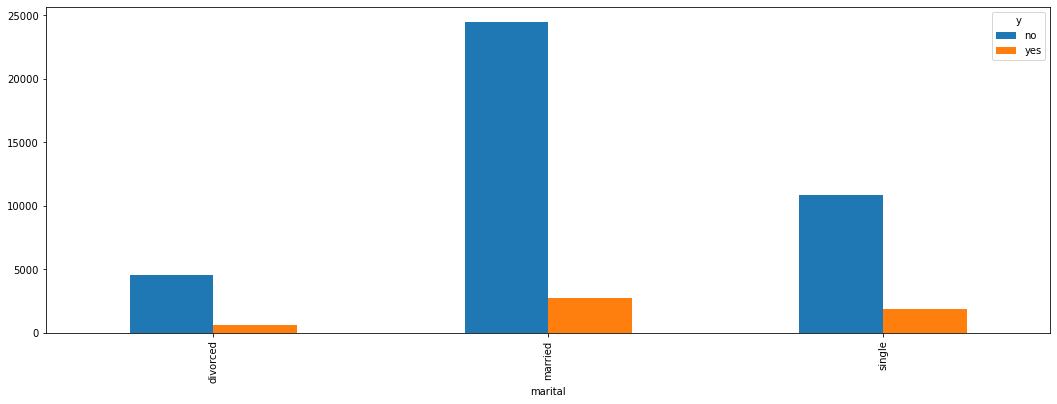

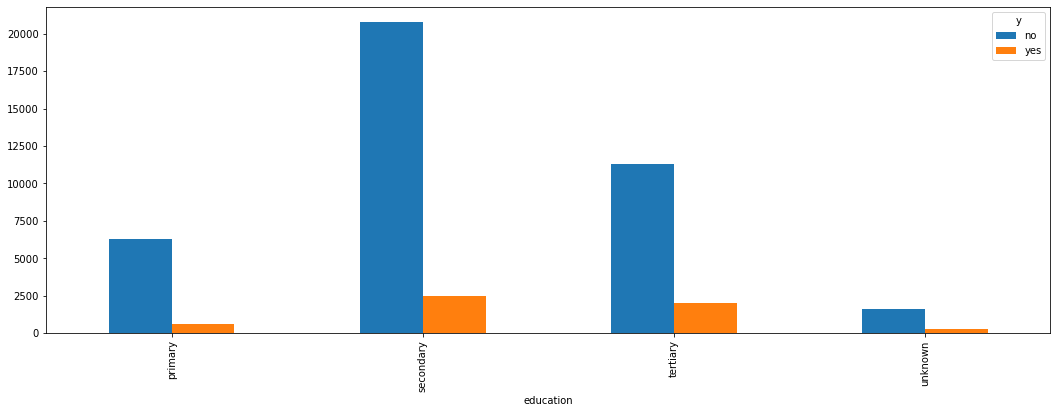

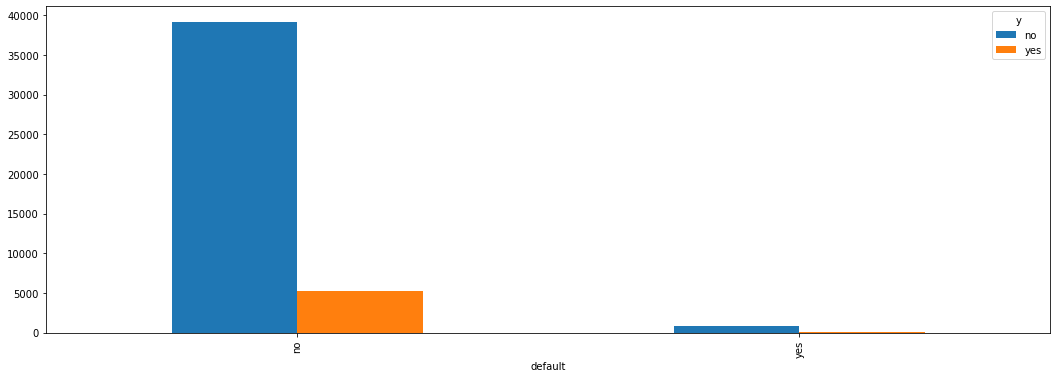

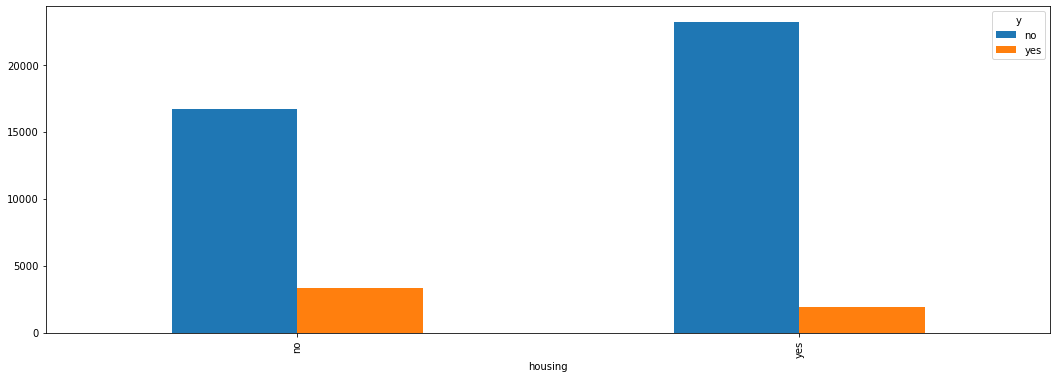

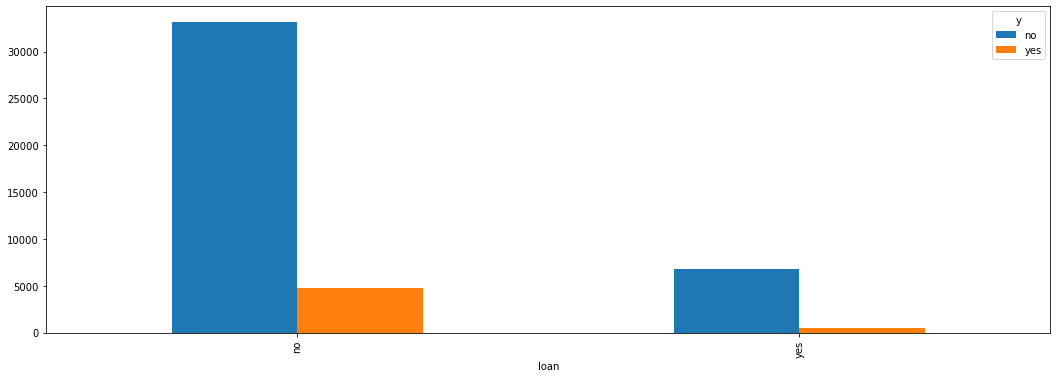

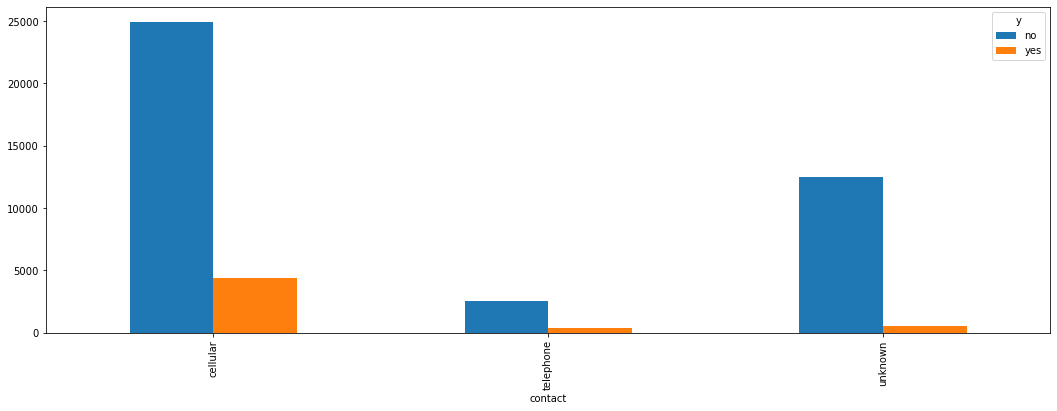

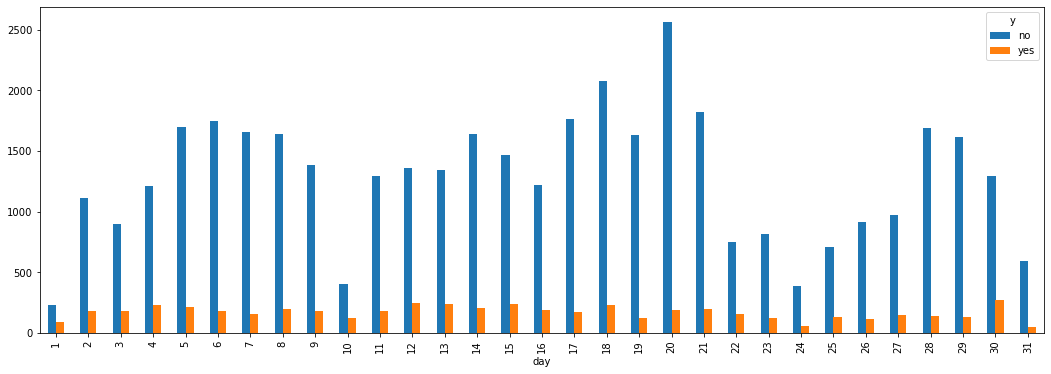

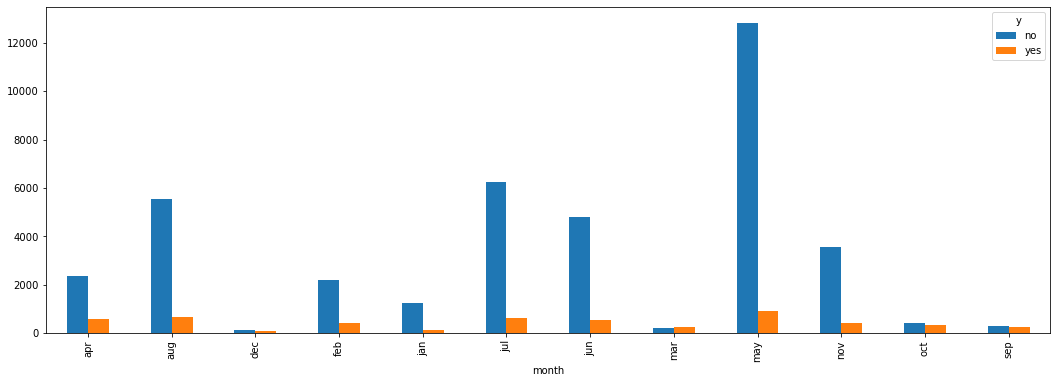

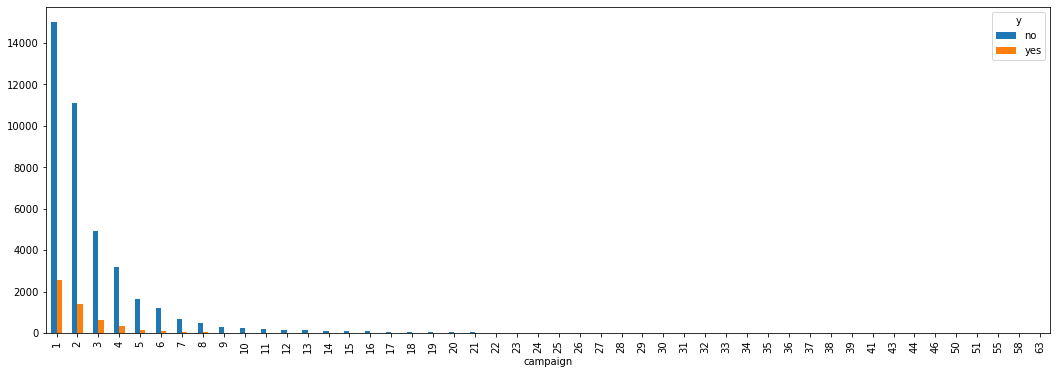

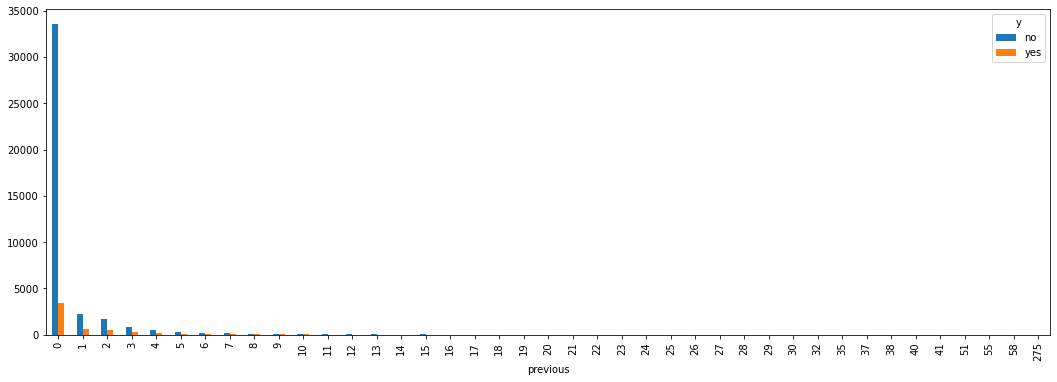

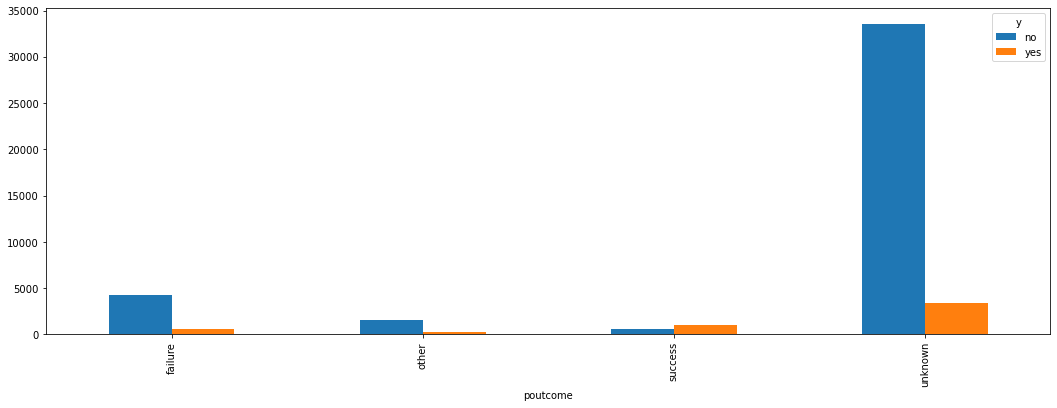

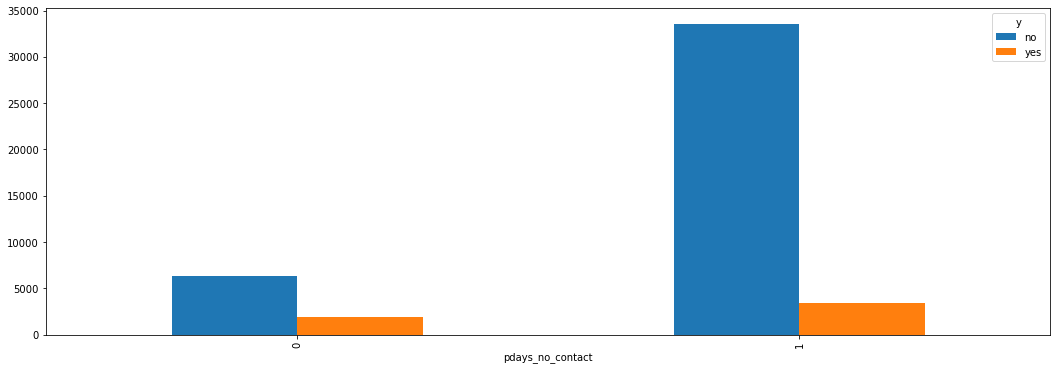

In [11]:
# Visualizing the data to see if there is any relation of the dependant variable with the independant variables
not_plot = ["balance", "duration", "pdays", "y"] # not plotting this due to high data and y as it is dependant

for col in raw_data.columns:
    if col not in not_plot:  
        plt.rcParams["figure.figsize"] = (18,6)
        pd.crosstab(raw_data[col],raw_data.y).plot(kind="bar")

In [12]:
# Quick EDA. The file with all the EDA can be found in the root folder
EDA_report= pp.ProfileReport(raw_data)
EDA_report.to_file(output_file='EDA_report.html')

In [103]:
# Changing the Binary categorical data to 0 & 1
data = raw_data.copy()
data["housing"] = data["housing"].map({"yes":1, "no":0})
data["loan"] = data["loan"].map({"yes":1, "no":0})
data["y"] = data["y"].map({"yes":1, "no":0})
data["default"] = data["default"].map({"yes":0, "no":1})
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_no_contact
0,58,management,married,tertiary,1,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,1
1,44,technician,single,secondary,1,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,1
2,33,entrepreneur,married,secondary,1,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,1
3,47,blue-collar,married,unknown,1,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,1
4,33,unknown,single,unknown,1,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,1,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1,1
45207,71,retired,divorced,primary,1,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1,1
45208,72,retired,married,secondary,1,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,0
45209,57,blue-collar,married,secondary,1,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0,1


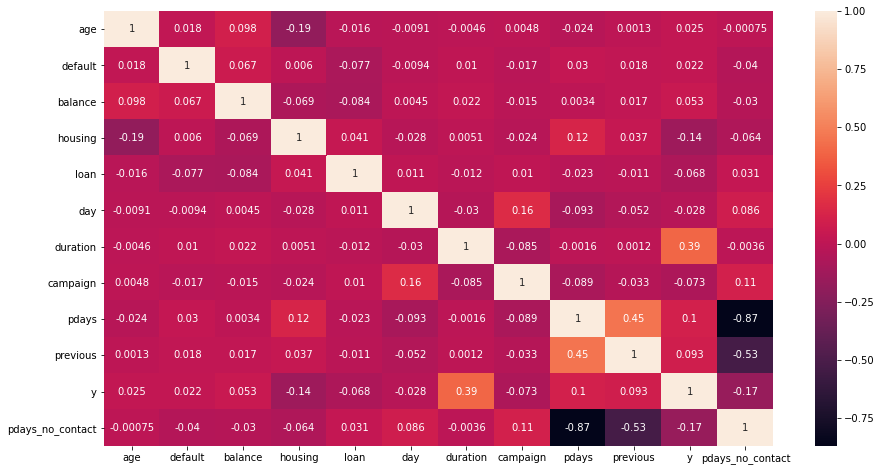

In [30]:
# Checking the correlation
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [104]:
# getting the dummies for the rest of the categorical data

data = pd.get_dummies(data, columns=["job", "marital", "education", "housing", "loan", "contact", "month", "poutcome"], drop_first=True)

### Processing the data:

In [105]:
x = data.loc[:,data.columns != "y"]
y = data["y"]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [106]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Feature Selection:

#### Mutual information statistic is used to determine the best features as we had both categorical and numerical data to predict the dependant variable:

In [139]:
def best_features(x_train,y_train,x_test):
    bf = SelectKBest(score_func=mutual_info_classif, k = 10)
    bf.fit(x_train,y_train)
    x_train_bf = bf.transform(x_train)
    x_test_bf = bf.transform(x_test)
    return x_train_bf, x_test_bf, bf, bf.get_support()

x_train_bf, x_test_bf, bf, bf_list = best_features(x_train,y_train,x_test)

x_features = []

print("Feature Scores:")
for i in range(len(bf.scores_)):
    x_features.append(x.columns[i])
    print(f"{x.columns[i]}: {bf.scores_[i]}")

Feature Scores:
age: 0.012704046022617765
default: 0.0016397274050490296
balance: 0.021063684231439783
day: 0.006829928686367559
duration: 0.07508779986918146
campaign: 0.003945650608896845
pdays: 0.024044830425840713
previous: 0.011692661844646235
pdays_no_contact: 0.012383948174566672
job_blue-collar: 0.004578437661576951
job_entrepreneur: 0.002291660549507357
job_housemaid: 0.0010710347005311593
job_management: 0.0
job_retired: 0.004432963117457778
job_self-employed: 0.00011972251999692318
job_services: 0.0027980595569849775
job_student: 0.0023359088892764834
job_technician: 0.0
job_unemployed: 0.0010204120352532708
job_unknown: 0.0020153035422525445
marital_married: 0.0032572176819065657
marital_single: 0.0016439723915280258
education_secondary: 0.003303992148087742
education_tertiary: 0.004468058718759327
education_unknown: 0.004305546652804804
housing_1: 0.012368643040061134
loan_1: 0.0060056101426151365
contact_telephone: 0.00040346552853187667
contact_unknown: 0.014147015302503

In [140]:
bf_list

array([ True, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True])

In [147]:
# Getting the index number of the variables used as the best features
items = []
num = 0
for i in range(len(bf_list)):
    if bf_list[i] == True:
        items.append(i)
item

[0, 2, 4, 6, 7, 8, 25, 28, 41, 42]

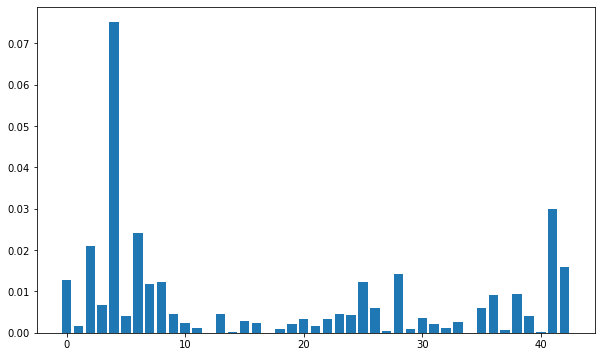

In [142]:
# Plotting the scores for the features
feature_scores = []

for i in range(len(bf.scores_)):
    feature_scores.append(bf.scores_[i])


plt.bar([i for i in range(len(bf.scores_))], bf.scores_)
plt.show()

### Training the logistic regression model:

In [166]:
log_reg_model_bf = LogisticRegression()
log_reg_model_bf.fit(x_train_bf,y_train)

LogisticRegression()

#### Prediction:

In [162]:
# Getting the best features in a new dataframe
new_x = x.copy()
for_new_x = []

for index in items:
    for_new_x.append(new_x.columns[index])

new_x = new_x[for_new_x]
new_x

,age,balance,duration,pdays,previous,pdays_no_contact,housing_1,contact_unknown,poutcome_success,poutcome_unknown
0,58,2143,261,-1,0,1,1,1,0,1
1,44,29,151,-1,0,1,1,1,0,1
2,33,2,76,-1,0,1,1,1,0,1
3,47,1506,92,-1,0,1,1,1,0,1
4,33,1,198,-1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,-1,0,1,0,0,0,1
45207,71,1729,456,-1,0,1,0,0,0,1
45208,72,5715,1127,184,3,0,0,0,1,0
45209,57,668,508,-1,0,1,0,0,0,1


#### The features that we have used are the following:

In [179]:
for feature in for_new_x:
    print(feature, end=", ")

age, balance, duration, pdays, previous, pdays_no_contact, housing_1, contact_unknown, poutcome_success, poutcome_unknown, 

In [169]:
# Transforming and predicting on the full data
new_x_sc = scaler.fit_transform(new_x)
y_pred = log_reg_model_bf.predict(new_x_sc)
x["Predicted"] = y_pred
x

,age,default,balance,day,duration,campaign,pdays,previous,pdays_no_contact,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Predicted
0,58,1,2143,5,261,1,-1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,44,1,29,5,151,1,-1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,33,1,2,5,76,1,-1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1,1506,5,92,1,-1,0,1,1,...,0,0,1,0,0,0,0,0,1,0
4,33,1,1,5,198,1,-1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,825,17,977,3,-1,0,1,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1,1729,17,456,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
45208,72,1,5715,17,1127,5,184,3,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,1,668,17,508,4,-1,0,1,1,...,0,0,0,1,0,0,0,0,1,0


#### Confusion marix:

In [170]:
confusion_matrix = metrics.confusion_matrix(y, y_pred)
confusion_matrix

array([[38955,   967],
       [ 3576,  1713]], dtype=int64)

In [171]:
pd.crosstab(y, y_pred)

col_0,0,1
y,,
0,38955,967
1,3576,1713


#### Accuracy:

In [173]:
train_accuracy = log_reg_model_bf.score(x_train_bf,y_train)
test_accuracy = log_reg_model_bf.score(x_test_bf,y_test)


print(f'''Train Accuracy: {train_accuracy}
Test Accuracy: {test_accuracy}''')

Train Accuracy: 0.901317660441748
Test Accuracy: 0.8951636685343557


In [174]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94     39922
           1       0.64      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



In [175]:
Logit_roc_score=roc_auc_score(y,log_reg_model_bf.predict(new_x_sc))
Logit_roc_score

0.6498287585351844

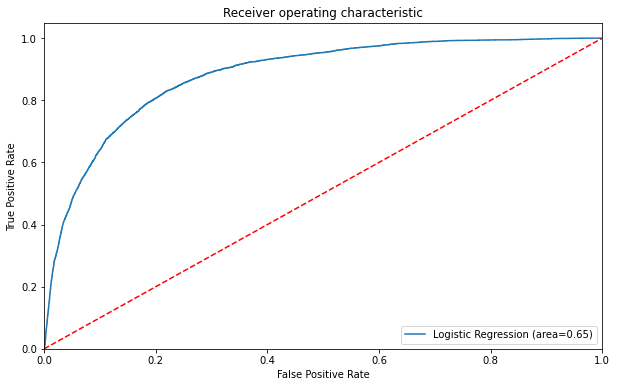

In [176]:
fpr, tpr, thresholds = roc_curve(y,log_reg_model_bf.predict_proba(new_x_sc)[:,1]) 
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [177]:
y_prob1 = pd.DataFrame(log_reg_model_bf.predict_proba(x_train_bf)[:,1]) 
y_prob1

,0
0,0.028409
1,0.080188
2,0.012366
3,0.024633
4,0.040578
...,...
31642,0.053277
31643,0.048086
31644,0.120703
31645,0.106726


## Using the logit model:

In [180]:
logit = sm.Logit(y_train,x_train_bf) 

In [181]:
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.620982
         Iterations 8


In [182]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31637
Method:                           MLE   Df Model:                            9
Date:                Fri, 05 Feb 2021   Pseudo R-squ.:                 -0.7233
Time:                        16:07:23   Log-Likelihood:                -19652.
converged:                       True   LL-Null:                       -11404.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0008      0.012     -0.065      0.949      -0.025       0.024
x2             0.0420      0.012      3.393      0.001       0.018       0.066
x3             0.6678      0.016     42.216      0.000       0.637       0.699
x4            -0.0240      0.027     -0.905      0.366      -0.076       0.028
x5             0.0138      0.016      0.881      0.378      -0.017       0.044
x6            -0.3627      0.477     -0.760      0.447      -1.298       0.572
x7            -0.1492      0.013    -11.665      0.000      -0.174      -0.124
x8            -0.1176      0.013     -9.114      0.000      -0.143      -0.092
x9             1.1767      0.061     19.338      0.000       1.057       1.296
x10            0.2890      0.476      0.607      0.544      -0.644       1.222
==============================================================================
"""

###### Not removing the features with p-values greater than 0.05 as these are the best features as proven by Mutual Information technique

In [183]:
y_pred_logit = logit_model.predict()
y_pred_logit

array([0.39969769, 0.43689588, 0.33413549, ..., 0.49775757, 0.46351161,
       0.32131013])

In [184]:
logit_model.pred_table()

array([[22550.,  5403.],
       [  760.,  2934.]])

In [185]:
cm_df = pd.DataFrame(logit_model.pred_table())
cm_df.columns = ["Predicted 0", "Predicted 1"]
cm_df = cm_df.rename(index={0:"Actual 0", 1:"Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,22550.0,5403.0
Actual 1,760.0,2934.0


In [190]:
logit_accuracy = (cm_df.iloc[0,0] + cm_df.iloc[1,1])/ x_train.shape[0]
logit_accuracy

0.8052580023382943

### Conclusion:

###### The accuracy of the models are given in the below table`

In [196]:
model_table = pd.DataFrame({
    "Model": ["logistic regression model", "logit model"],
    "accuracy": [test_accuracy, logit_accuracy]
})
model_table

,Model,accuracy
0,logistic regression model,0.895164
1,logit model,0.805258
